In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn import tree #决策树
from sklearn.tree import DecisionTreeClassifier #分类树
from sklearn.model_selection  import train_test_split#测试集和训练集
from sklearn.pipeline import Pipeline #管道
from sklearn.feature_selection import SelectKBest #特征选择
from sklearn.feature_selection import chi2 #卡方统计量

from sklearn.preprocessing import MinMaxScaler  #数据归一化
from sklearn.decomposition import PCA #主成分分析
from sklearn.model_selection import GridSearchCV #网格搜索交叉验证，用于选择最优的参数

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

In [5]:
#读取数据
path = './datas/iris.data'  
data = pd.read_csv(path, header=None)
x=data[list(range(4))]#获取X变量
y=pd.Categorical(data[4]).codes#把Y转换成分类型的0,1,2
print("总样本数目：%d;特征属性数目:%d" % x.shape)

总样本数目：150;特征属性数目:4


In [6]:
data.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#数据进行分割（训练数据和测试数据）
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=14)

In [8]:
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

训练数据集样本数目：120, 测试数据集样本数目：30


In [9]:
y_train

array([0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2,
       2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0,
       0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2,
       2, 1, 0, 1, 2])

In [10]:
#数据标准化
#StandardScaler (基于特征矩阵的列，将属性值转换至服从正态分布)
#标准化是依照特征矩阵的列处理数据，其通过求z-score的方法，将样本的特征值转换到同一量纲下
#常用与基于正态分布的算法，比如回归

#数据归一化
#MinMaxScaler （区间缩放，基于最大最小值，将数据转换到0,1区间上的）
#提升模型收敛速度，提升模型精度
#常见用于神经网络

#Normalizer （基于矩阵的行，将样本向量转换为单位向量）
#其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准
#常见用于文本分类和聚类、logistic回归中也会使用，有效防止过拟合

ss = MinMaxScaler ()
#用标准化方法对数据进行处理并转换
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
print ("原始数据各个特征属性的调整最小值:",ss.min_)
print ("原始数据各个特征属性的缩放数据值:",ss.scale_)

原始数据各个特征属性的调整最小值: [-1.19444444 -0.83333333 -0.18965517 -0.04166667]
原始数据各个特征属性的缩放数据值: [ 0.27777778  0.41666667  0.17241379  0.41666667]


In [11]:
#特征选择：从已有的特征中选择出影响目标值最大的特征属性
#常用方法：{ 分类：F统计量、卡方系数，互信息mutual_info_classif
        #{ 连续：皮尔逊相关系数 F统计量 互信息mutual_info_classif
#SelectKBest（卡方系数）

ch2 = SelectKBest(chi2,k=3)#在当前的案例中，使用SelectKBest这个方法从4个原始的特征属性，选择出来3个
#K默认为10
#如果指定了，那么就会返回你所想要的特征的个数
x_train = ch2.fit_transform(x_train, y_train)#训练并转换
x_test = ch2.transform(x_test)#转换

select_name_index = ch2.get_support(indices=True)
print ("对类别判断影响最大的三个特征属性分布是:",ch2.get_support(indices=False))
print(select_name_index)

对类别判断影响最大的三个特征属性分布是: [ True False  True  True]
[0 2 3]


In [12]:
#降维：对于数据而言，如果特征属性比较多，在构建过程中，会比较复杂，这个时候考虑将多维（高维）映射到低维的数据
#常用的方法：
#PCA：主成分分析（无监督）
#LDA：线性判别分析（有监督）类内方差最小，人脸识别，通常先做一次pca

pca = PCA(n_components=2)#构建一个pca对象，设置最终维度是2维
# #这里是为了后面画图方便，所以将数据维度设置了2维，一般用默认不设置参数就可以

x_train = pca.fit_transform(x_train)#训练并转换
x_test = pca.transform(x_test)#转换

In [13]:
#模型的构建
model = DecisionTreeClassifier(criterion='entropy',random_state=0, min_samples_split=10)#另外也可选gini 
#模型训练
model.fit(x_train, y_train)
#模型预测
y_test_hat = model.predict(x_test) 

In [14]:
#模型结果的评估
y_test2 = y_test.reshape(-1)
result = (y_test2 == y_test_hat)
print ("准确率:%.2f%%" % (np.mean(result) * 100))
#实际可通过参数获取
print ("Score：", model.score(x_test, y_test))#准确率
print ("Classes:", model.classes_)

准确率:96.67%
Score： 0.966666666667
Classes: [0 1 2]


In [15]:
# 方式一：输出形成dot文件，然后使用graphviz的dot命令将dot文件转换为pdf
from sklearn import tree
with open('iris.dot', 'w') as f:
    # 将模型model输出到给定的文件中
    f = tree.export_graphviz(model, out_file=f)
# 命令行执行dot命令： dot -Tpdf iris.dot -o iris.pdf

In [16]:
# 方式二：直接使用pydotplus插件生成pdf文件
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
# graph.write_pdf("iris2.pdf") 
graph.write_png("0.png")

True

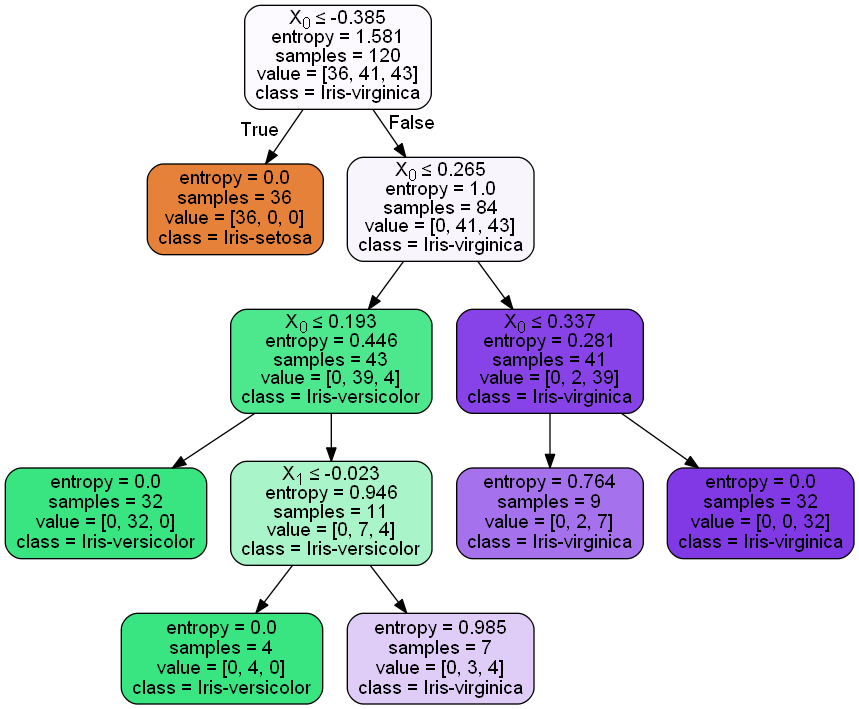

In [17]:
# 方式三：直接生成图片
from sklearn import tree
from IPython.display import Image
import pydotplus
#      feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],  
dot_data = tree.export_graphviz(model, out_file=None, 
                         class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],  
                         filled=True, rounded=True, special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 